In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
folder_path = "C:\\workspace\\Kaggle\\Airbus\\train\\"

In [5]:
# filename = "0a3b48a9c.jpg"
# filename = "0a1a7f395.jpg"
# filename = "0a286fb15.jpg"
# filename = "00003e153.jpg" # no ship

# filename = "000155de5.jpg" # line nr.2 in csv train_ship_seg

filename = "0006c52e8.jpg" # line nr.22 in csv train_ship_seg

In [6]:
img_path = folder_path + filename

In [7]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

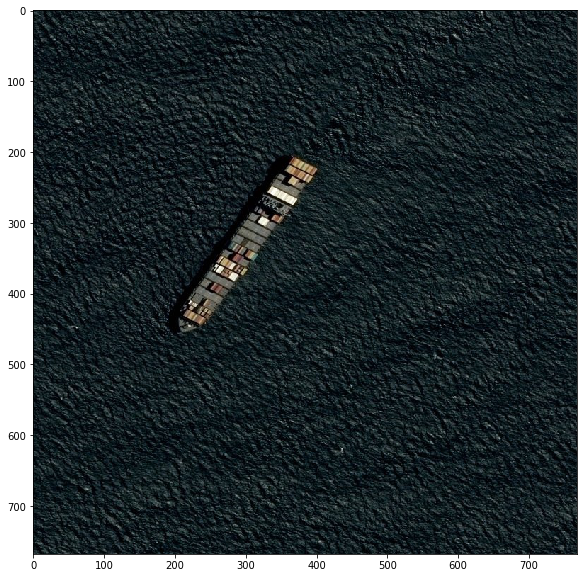

In [8]:
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

In [9]:
# print(146366/768)
# print(146366%768)

In [10]:
img.shape

(768, 768, 3)

In [11]:
img_height = img.shape[0]
img_width = img.shape[1]

In [12]:
img_height

768

### Read csv format file

In [13]:
csv_train_filepath = "../train_ship_segmentations.csv"

In [14]:
train = pd.read_csv(csv_train_filepath, names=["ImageId", "EncodedPixels"])

In [15]:
train[:5]

,ImageId,EncodedPixels
0,ImageId,EncodedPixels
1,00003e153.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...
4,00021ddc3.jpg,95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...


In [16]:
# train[21:22]
train[0:2]

,ImageId,EncodedPixels
0,ImageId,EncodedPixels
1,00003e153.jpg,NaN


In [17]:
train["EncodedPixels"][21]
# train["EncodedPixels"][2]

'146366 1 147132 4 147899 5 148666 7 149432 10 150199 12 150966 13 151732 16 152499 18 153265 20 154032 22 154799 24 155565 27 156332 28 157099 30 157865 33 158632 35 159398 37 160165 39 160932 41 161698 43 162465 45 163231 48 163998 50 164765 51 165531 54 166298 56 167065 57 167831 60 168598 62 169364 65 170131 66 170898 68 171664 71 172431 73 173198 74 173964 77 174731 77 175497 77 176264 77 177031 77 177797 77 178564 77 179331 77 180097 77 180864 77 181630 77 182397 77 183164 77 183930 77 184697 77 185464 77 186230 77 186997 77 187763 77 188530 77 189297 77 190063 77 190830 77 191597 76 192363 77 193130 77 193896 77 194663 77 195430 77 196196 77 196963 77 197729 77 198496 77 199263 77 200029 77 200796 77 201563 77 202329 77 203096 77 203862 77 204629 77 205396 77 206162 77 206929 77 207696 77 208462 77 209229 77 209995 77 210762 77 211529 77 212295 77 213062 77 213829 77 214595 77 215362 77 216128 77 216895 77 217662 77 218428 77 219195 77 219962 77 220728 77 221495 77 222261 77 223

In [18]:
test = train["EncodedPixels"][21]
# test = train["EncodedPixels"][2]

In [19]:
test

'146366 1 147132 4 147899 5 148666 7 149432 10 150199 12 150966 13 151732 16 152499 18 153265 20 154032 22 154799 24 155565 27 156332 28 157099 30 157865 33 158632 35 159398 37 160165 39 160932 41 161698 43 162465 45 163231 48 163998 50 164765 51 165531 54 166298 56 167065 57 167831 60 168598 62 169364 65 170131 66 170898 68 171664 71 172431 73 173198 74 173964 77 174731 77 175497 77 176264 77 177031 77 177797 77 178564 77 179331 77 180097 77 180864 77 181630 77 182397 77 183164 77 183930 77 184697 77 185464 77 186230 77 186997 77 187763 77 188530 77 189297 77 190063 77 190830 77 191597 76 192363 77 193130 77 193896 77 194663 77 195430 77 196196 77 196963 77 197729 77 198496 77 199263 77 200029 77 200796 77 201563 77 202329 77 203096 77 203862 77 204629 77 205396 77 206162 77 206929 77 207696 77 208462 77 209229 77 209995 77 210762 77 211529 77 212295 77 213062 77 213829 77 214595 77 215362 77 216128 77 216895 77 217662 77 218428 77 219195 77 219962 77 220728 77 221495 77 222261 77 223

In [20]:
coord_list = test.split(" ")

In [21]:
coord_list[:10]

['146366', '1', '147132', '4', '147899', '5', '148666', '7', '149432', '10']

### Create list of pair value 

In [22]:
pair_list = []

In [23]:
for ite,value in enumerate(coord_list):
    if ite%2 == 0:
        pair_list.append((int(value), int(coord_list[ite+1])))

In [24]:
pair_list

[(146366, 1),
 (147132, 4),
 (147899, 5),
 (148666, 7),
 (149432, 10),
 (150199, 12),
 (150966, 13),
 (151732, 16),
 (152499, 18),
 (153265, 20),
 (154032, 22),
 (154799, 24),
 (155565, 27),
 (156332, 28),
 (157099, 30),
 (157865, 33),
 (158632, 35),
 (159398, 37),
 (160165, 39),
 (160932, 41),
 (161698, 43),
 (162465, 45),
 (163231, 48),
 (163998, 50),
 (164765, 51),
 (165531, 54),
 (166298, 56),
 (167065, 57),
 (167831, 60),
 (168598, 62),
 (169364, 65),
 (170131, 66),
 (170898, 68),
 (171664, 71),
 (172431, 73),
 (173198, 74),
 (173964, 77),
 (174731, 77),
 (175497, 77),
 (176264, 77),
 (177031, 77),
 (177797, 77),
 (178564, 77),
 (179331, 77),
 (180097, 77),
 (180864, 77),
 (181630, 77),
 (182397, 77),
 (183164, 77),
 (183930, 77),
 (184697, 77),
 (185464, 77),
 (186230, 77),
 (186997, 77),
 (187763, 77),
 (188530, 77),
 (189297, 77),
 (190063, 77),
 (190830, 77),
 (191597, 76),
 (192363, 77),
 (193130, 77),
 (193896, 77),
 (194663, 77),
 (195430, 77),
 (196196, 77),
 (196963, 77),

In [25]:
768*768

589824

In [26]:
mask = np.zeros(img_height * img_width)

In [27]:
mask.shape

(589824,)

### Draw on mask

In [28]:
for ite,next_pixel in pair_list:
    for ite in range(ite, ite+next_pixel+1):
        mask[ite] = 255

In [29]:
mask = np.reshape(mask, (img_height, img_width))

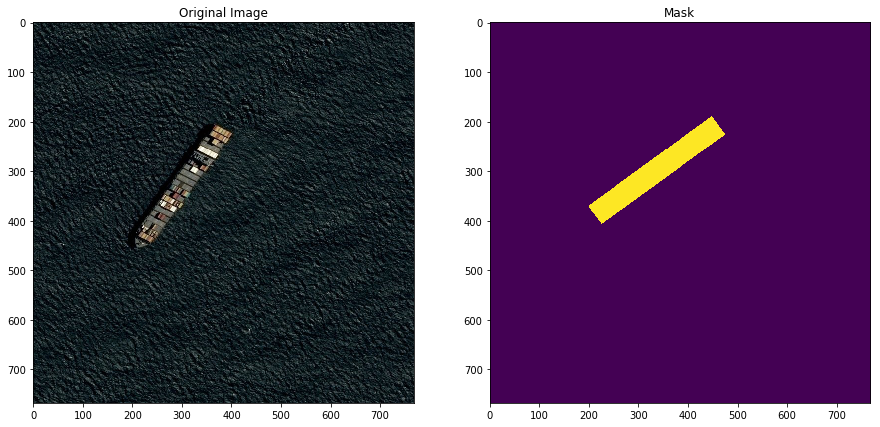

In [30]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(mask)
plt.title("Mask")

plt.show()

In [31]:
import scipy
from scipy import ndimage

In [32]:
rotated = ndimage.rotate(mask, 90)

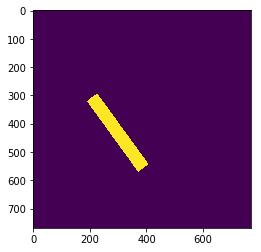

In [33]:
plt.imshow(rotated)
plt.show()

In [34]:
rimg = cv2.flip(rotated, 0)

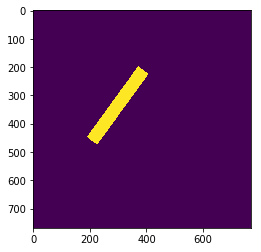

In [35]:
plt.imshow(rimg)
plt.show()

### Test: draw on copy of original image

In [36]:
copy_img = np.copy(img)

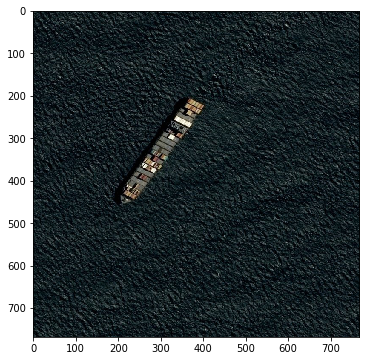

In [37]:
plt.figure(figsize=(8,6))
plt.imshow(copy_img)
plt.show()

In [38]:
# copy_img = np.reshape(copy_img, (img_height * img_width, -1))

In [39]:
copy_img.shape

(768, 768, 3)

In [40]:
# copy_img[:,:,0] = mask
copy_img[:,:,0] = rimg

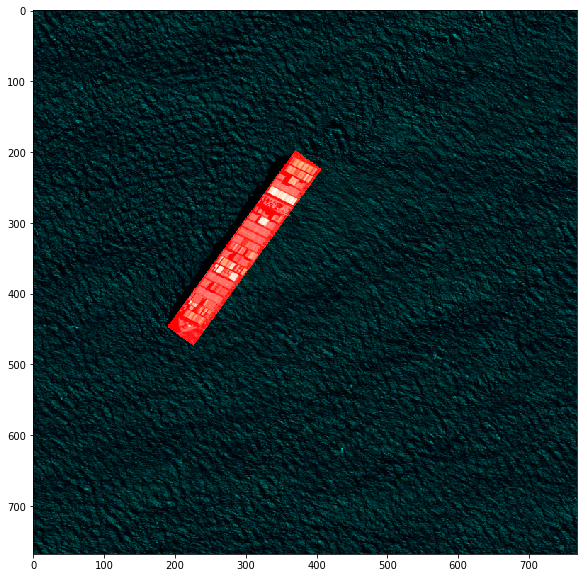

In [43]:
plt.figure(figsize=(15,10))
plt.imshow(copy_img)
plt.show()